In [10]:
import torch 
import numpy as np
from matplotlib import pyplot as plt


In [12]:
train_losses = torch.load('train_losses_model1.pt')
test_loss_and_outputs = torch.load('test_loss_and_output_model1.pt')

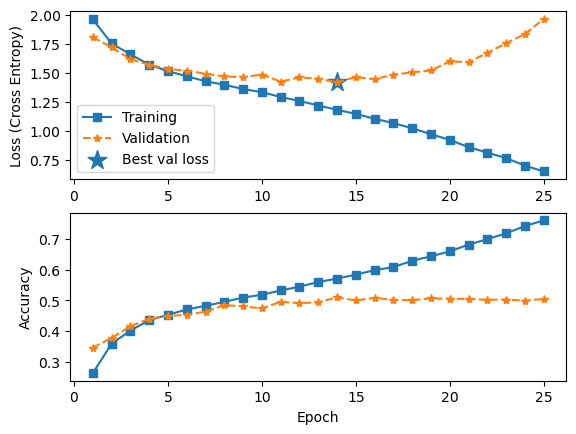

In [13]:
epochs = np.arange(1, 26)

val_losses = np.array(train_losses["val_losses"])
best_idx = np.argmin(val_losses)          # 0-based index
best_epoch = epochs[best_idx]
best_val_loss = val_losses[best_idx]

fig, axes = plt.subplots(2, 1)

axes[0].plot(epochs, train_losses['train_losses'], 's-', label="Training")
axes[0].plot(epochs, train_losses['val_losses'], '*--', label="Validation")

# Big star on best validation loss
axes[0].scatter(best_epoch, best_val_loss, marker='*', s=200, label="Best val loss")

axes[0].set_ylabel("Loss (Cross Entropy)")
axes[0].legend()

axes[1].plot(epochs, train_losses['train_accs'], 's-')
axes[1].plot(epochs, train_losses['val_accs'], '*--')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")

plt.show()


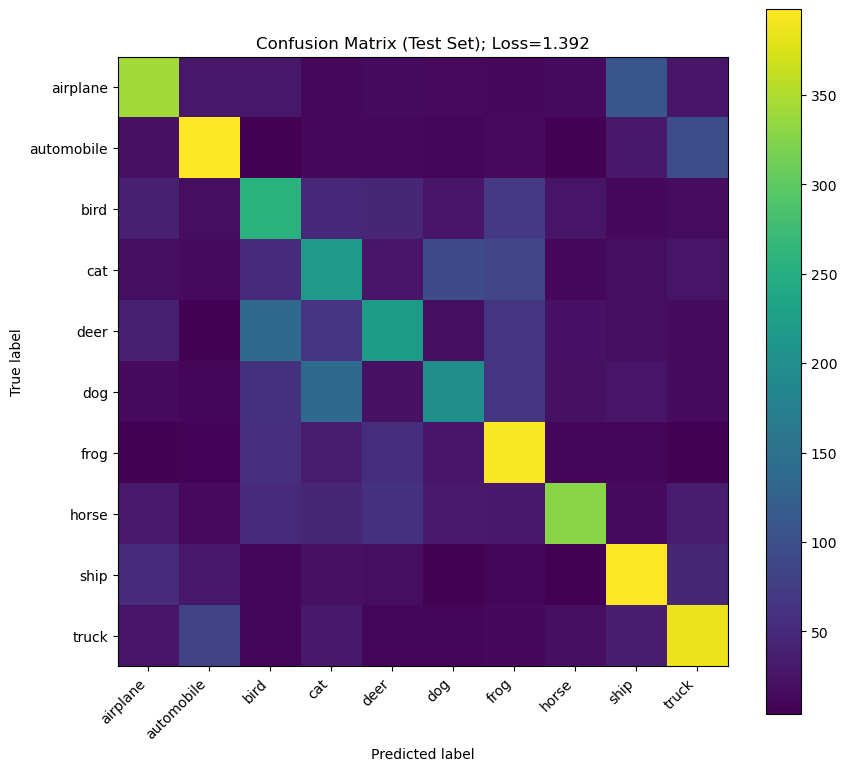

In [15]:
y_true = test_loss_and_outputs['y_true']
y_pred = test_loss_and_outputs['y_pred']
test_loss = test_loss_and_outputs['test_loss']



num_classes = 10  
cm = torch.zeros((num_classes, num_classes), dtype=torch.int64)
for t, p in zip(y_true, y_pred):
    cm[t, p] += 1

cm_np = cm.numpy()

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']  # ['airplane','automobile',...,'truck']

plt.figure(figsize=(9, 8))
plt.imshow(cm_np, interpolation="nearest")
plt.title(f"Confusion Matrix (Test Set); Loss={test_loss:.3f}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()

ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names, rotation=45, ha="right")
plt.yticks(ticks, class_names)

plt.tight_layout()
plt.show()